In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('../dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [127]:
df.drop(['RISK_MM'], axis=1, inplace=True)


In [128]:
#change the object data into year,month and day
# Let's convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year  #Add Year
df['Month'] = df['Date'].dt.month  #Add Month
df['Day'] = df['Date'].dt.day  #Add Day
#Remove Date
df.drop(['Date'], axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [149]:
def plot(numerical,df):
    #numeric est la liste des variable continues
    #df est le dataframe
    sns.set()
    fig , axes= plt.subplots(round(len(numerical)/4),round(len(numerical)/4), figsize=(40,40))
    l = 0 #Length
    w = 0 #Width
    for i in numerical:
        if w == round(len(numerical)/4):
            w = 0
            l +=1

        sns.boxplot(data=df, y=df[i], ax=axes[l,w])
        w+=1

In [150]:
def Outliers_corretion(numerical,df):
    #numeric est la liste des variable continues
    #df est le dataframe
    for i in numerical:
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        Lower = df[i].quantile(0.25) - (1.5 * IQR)
        upper = df[i].quantile(0.75) + (1.5 * IQR)
        df[i] = np.where(df[i]<upper, df[i], upper)
        df[i] = np.where(df[i]>Lower, df[i], Lower)


In [151]:
def replace_nan(df):
    #Les variables qualitatives
    categorical = [var for var in df.columns if df[var].dtype == 'O']
    #Les variables continues
    numerical = [var for var in df.columns if df[var].dtype != 'O']
    for df in [df]:
        for col in numerical:
            col_median = df[col].median()
            df[col].fillna(col_median, inplace=True)
        for col in categorical:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return numerical

In [152]:
def management_of_Outliers(data):
    numerical = replace_nan(data)
    plot(numerical,df)
    Outliers_corretion(numerical,df)
    plot(numerical,df)

new graph


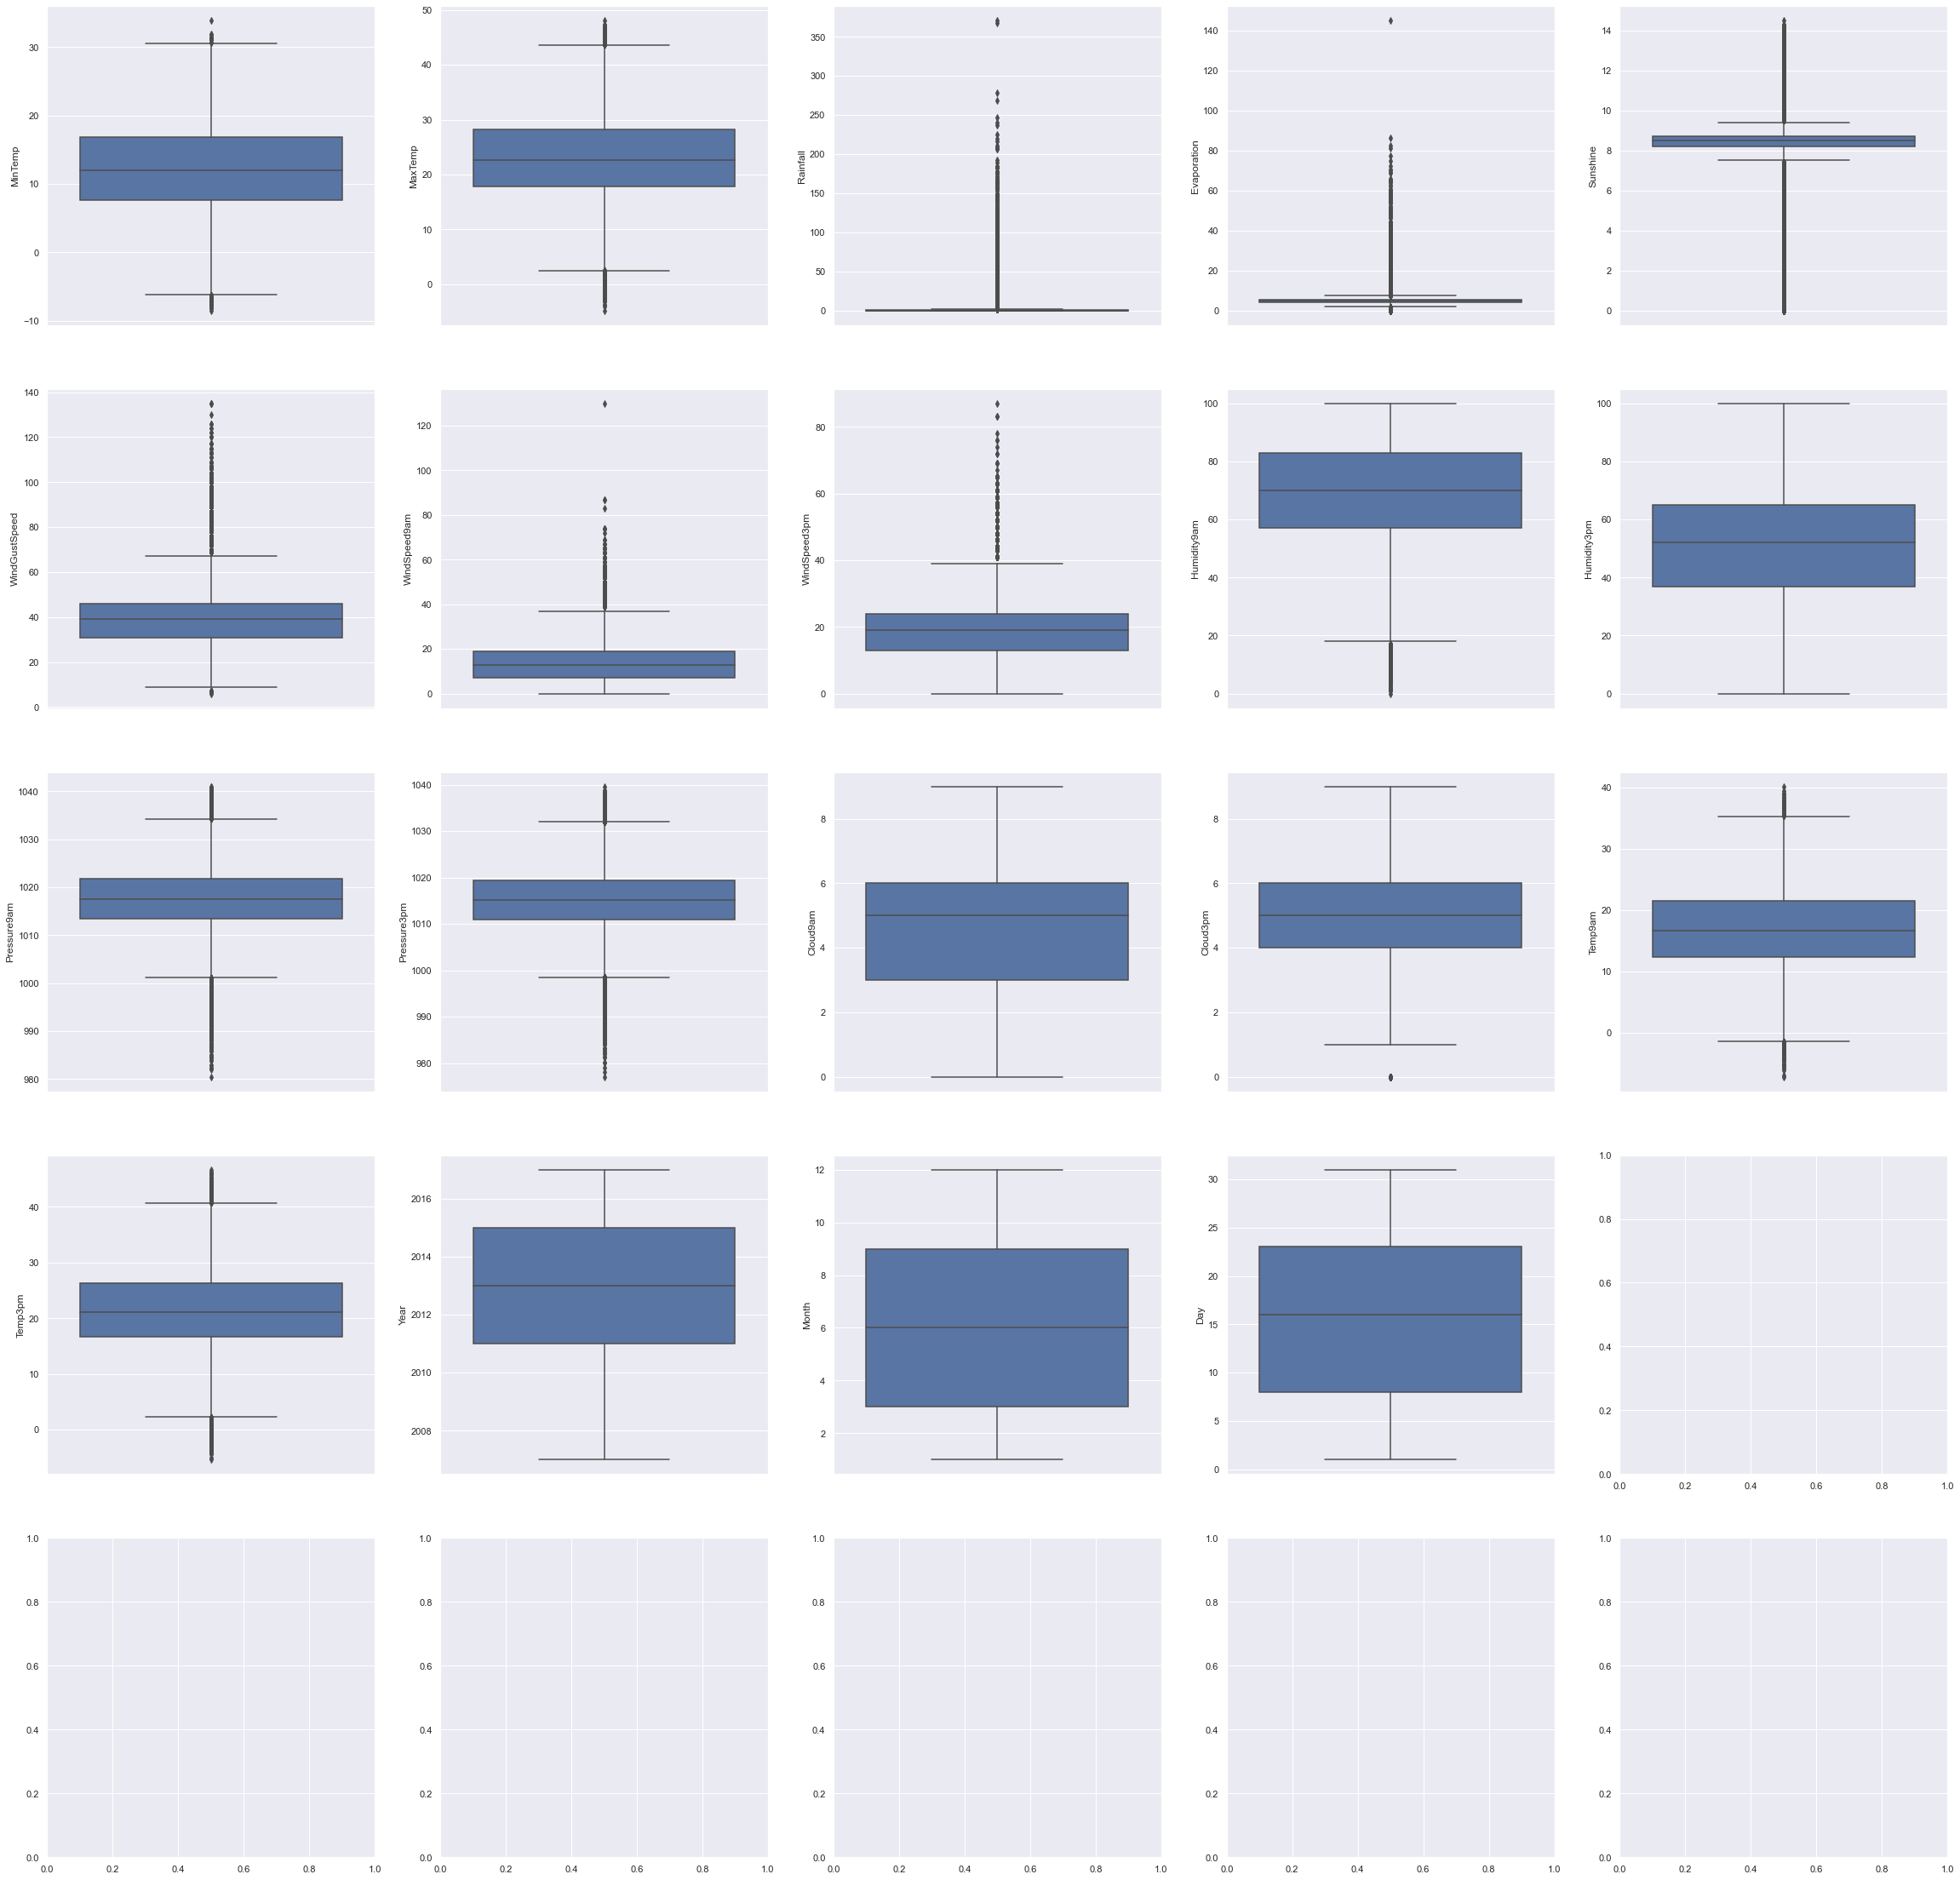

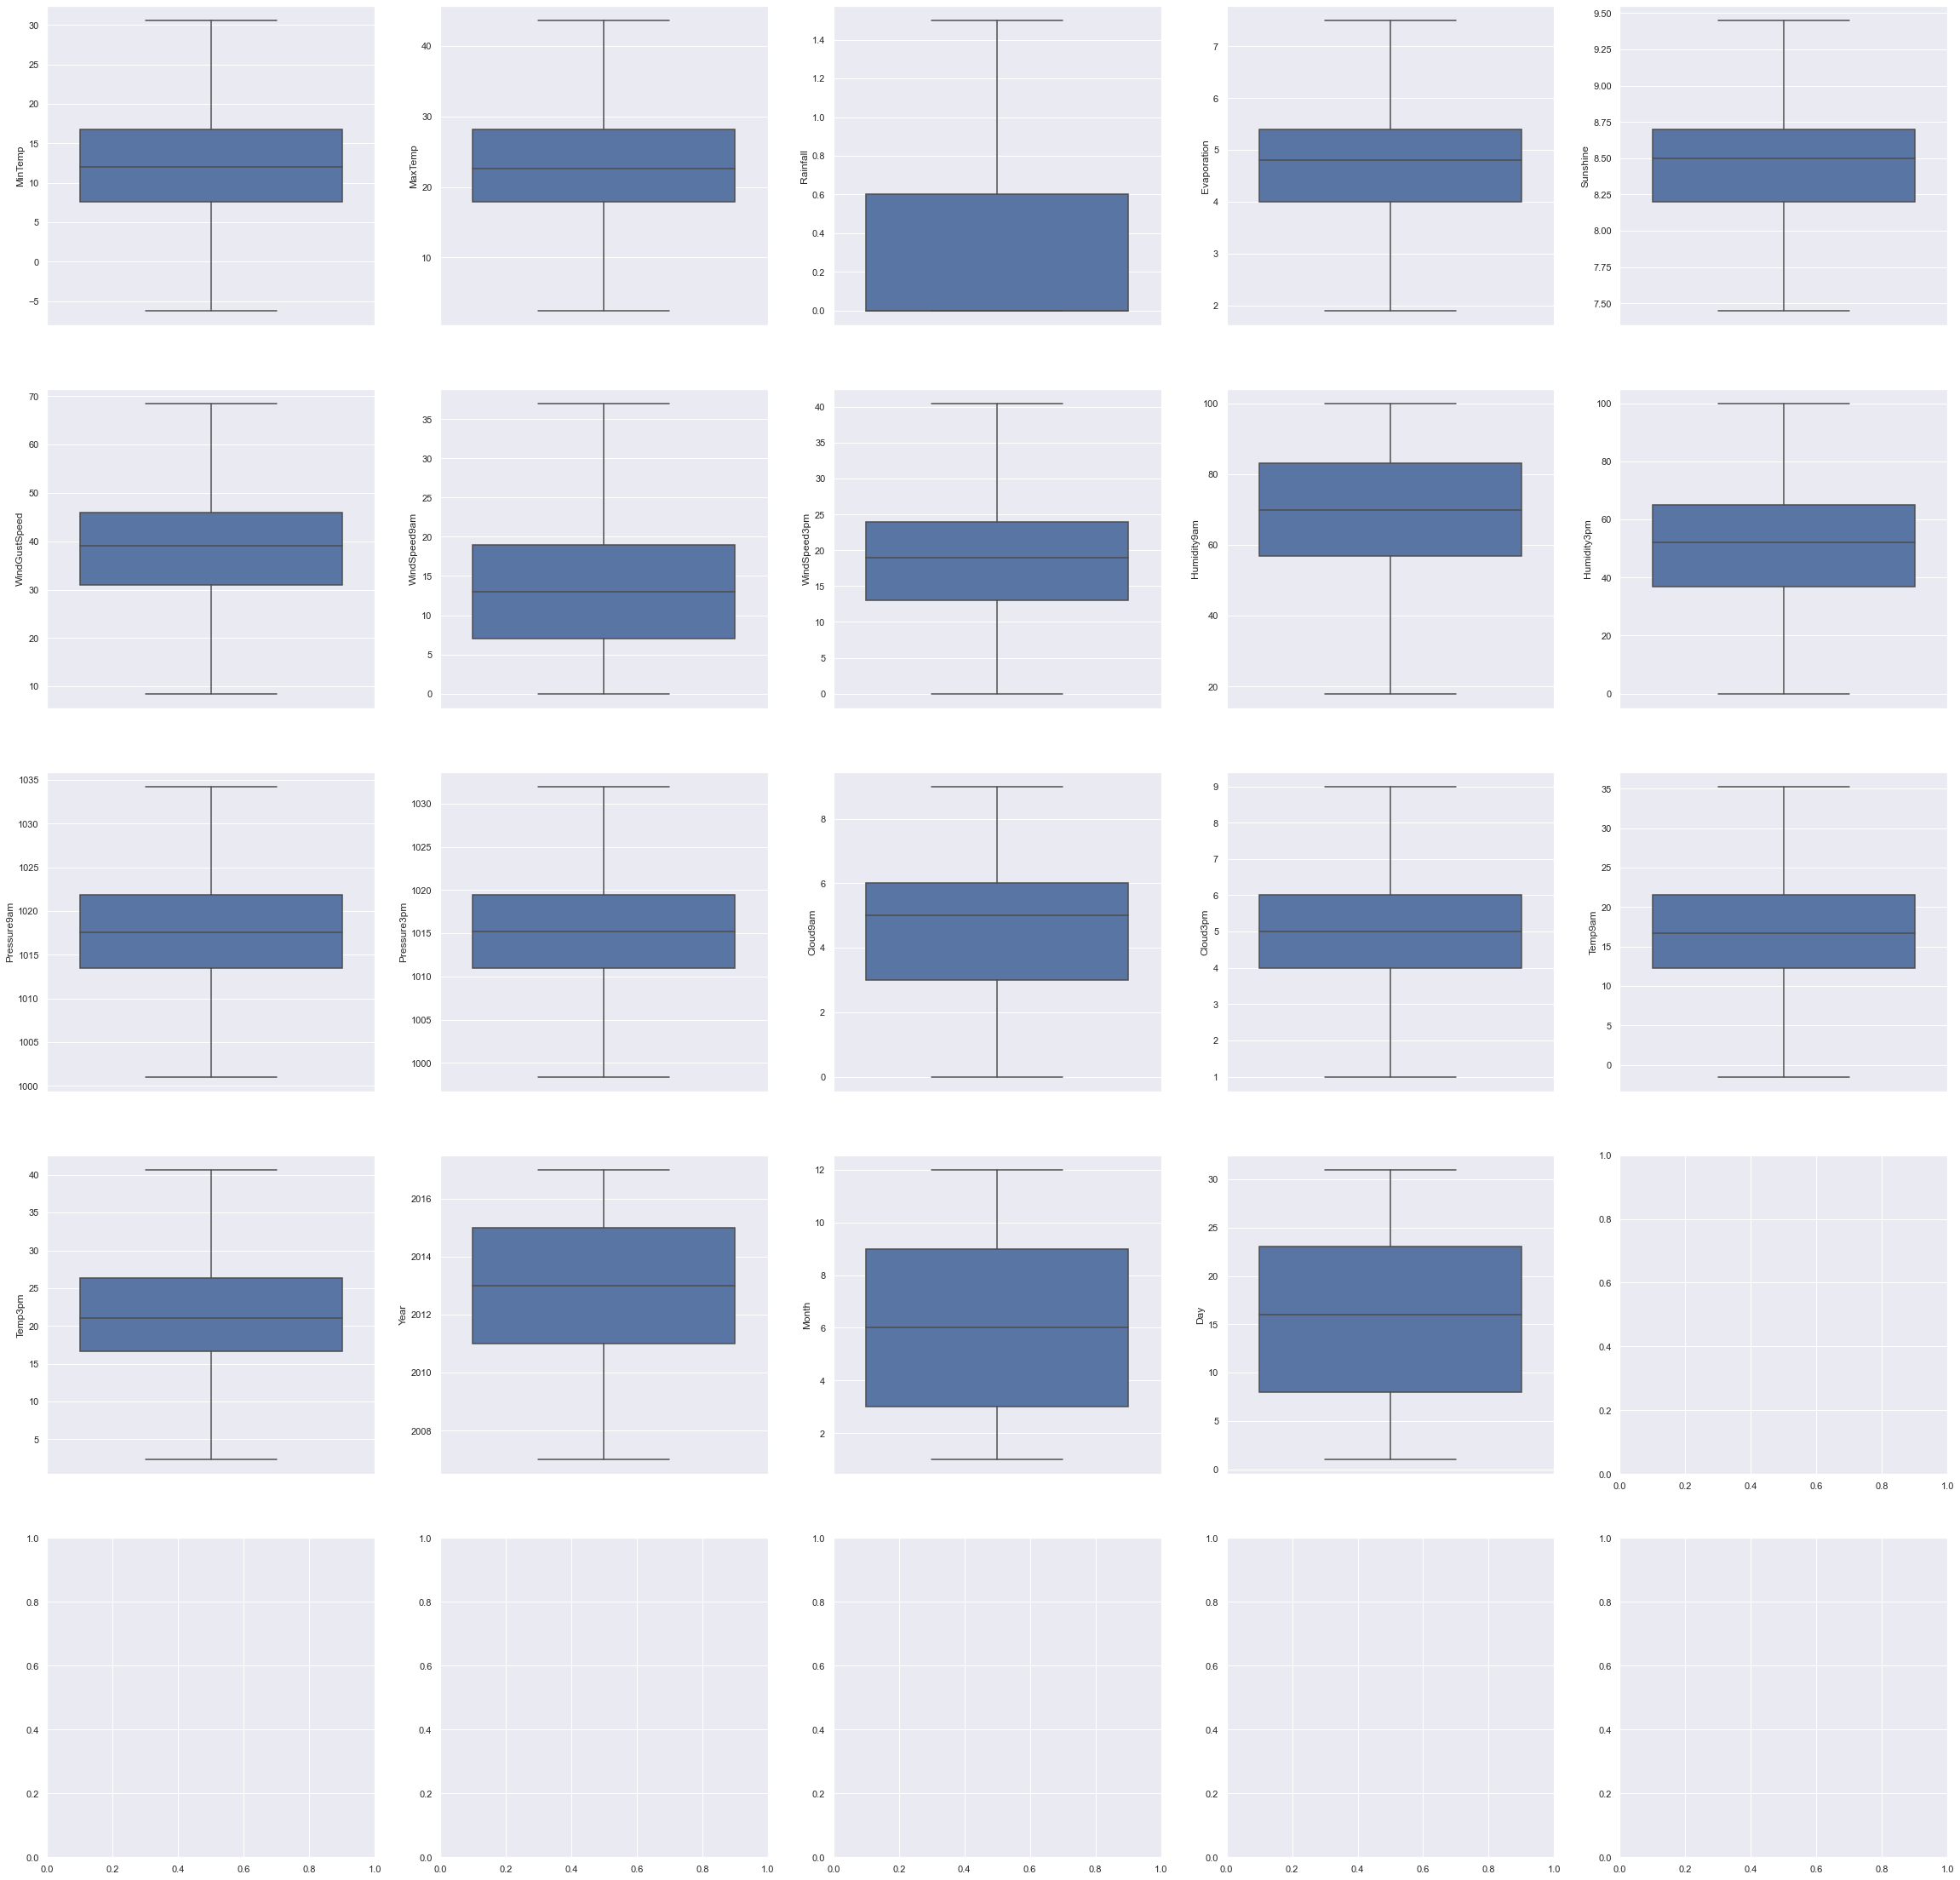

In [153]:
management_of_Outliers(df)